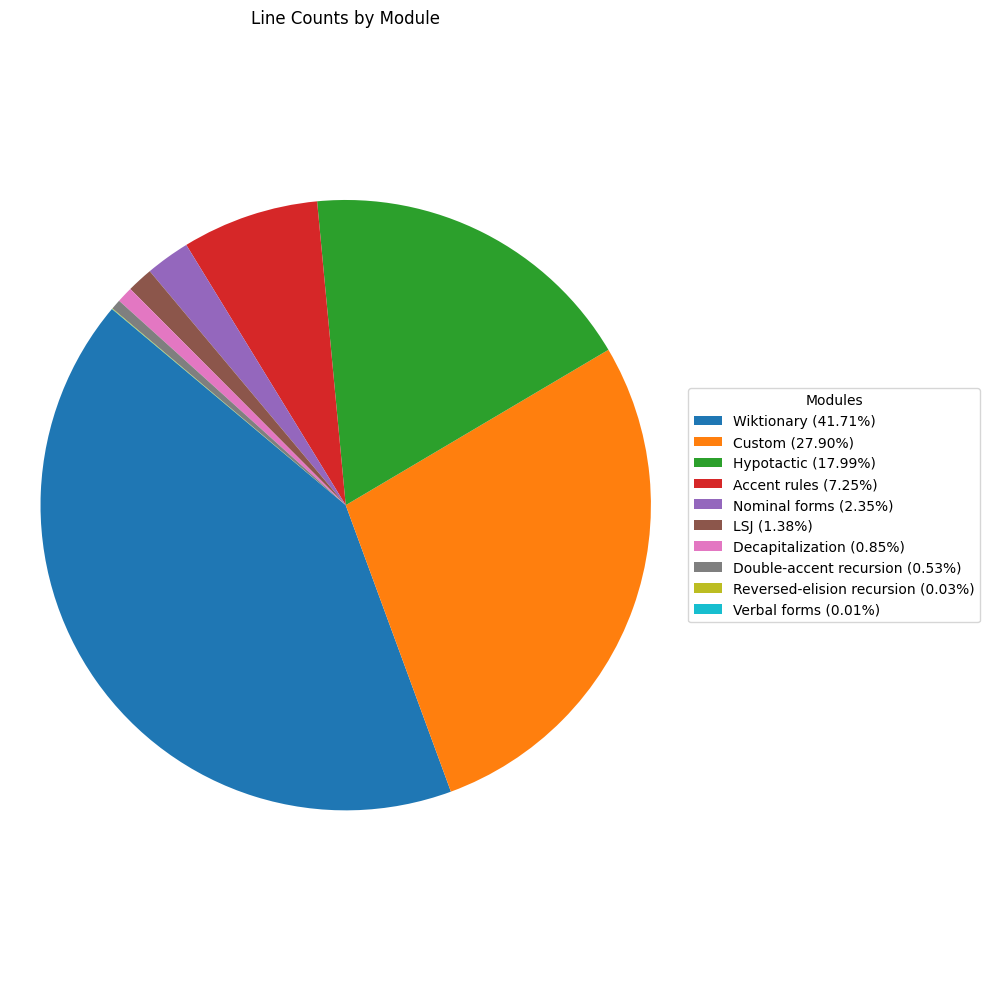

In [36]:
import os
import matplotlib.pyplot as plt

folder = "/Users/albin/git/macronize-tlg/diagnostics/modules"

group_counts = {}

# Walk through the folder
for root, dirs, files in os.walk(folder):
    for file in files:
        full_path = os.path.join(root, file)
        try:
            with open(full_path, 'r', encoding='utf-8', errors='ignore') as f:
                lines = sum(1 for _ in f)
            basename = os.path.basename(full_path)
            group_key = basename[16:]  # Remove timestamp prefix for grouping
            group_counts[group_key] = group_counts.get(group_key, 0) + lines
        except Exception as e:
            print(f"Skipped {full_path}: {e}")

# Prettify label function
def prettify(name):
    name = os.path.splitext(name)[0]  # Remove file extension
    name = name.replace('_', ' ').replace('results', '').rstrip()
    name = name.capitalize()
    if name == 'Lsj':
        return 'LSJ'
    if name == 'Double accent recursion':
        return 'Double-accent recursion'
    if name == 'Reversed elision recursion':
        return 'Reversed-elision recursion'
    return name

# Prepare raw labels and sizes
labels_raw = list(group_counts.keys())
sizes_raw = list(group_counts.values())
labels_pretty = [prettify(label) for label in labels_raw]

# Exclude empty or near-empty groups (≤1 line)
empty_threshold = 1
filtered_items = [(label, size) for label, size in zip(labels_pretty, sizes_raw) if size > empty_threshold]

if not filtered_items:
    print("No non-empty groups to plot.")
    exit()

# Sort filtered items by size descending
filtered_items.sort(key=lambda x: x[1], reverse=True)

labels_final, sizes_final = zip(*filtered_items)

# Compute percentages for legend labels
total = sum(sizes_final)
percent_labels = [f"{label} ({size / total * 100:.2f}%)" for label, size in zip(labels_final, sizes_final)]

# Plot pie chart without slice labels
plt.figure(figsize=(10, 10))
wedges, _ = plt.pie(
    sizes_final,
    labels=None,
    startangle=140
)

# Legend with labels + percentages, placed outside the pie
plt.legend(
    wedges,
    percent_labels,
    title="Modules",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

plt.title("Line Counts by Module")
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.savefig("line_counts_by_module.png", bbox_inches='tight')
plt.show()